Exploratory data analysis

Data preprocessing

Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn import set_config
set_config(display='diagram')
from statsmodels.api import OLS

In [ ]:
dataset = pd.read_csv('/content/sample_data/dataset-of-10s.csv')#importing CSV file


In [ ]:
dataset.shape  #dimension of the dataset

(6398, 19)

Displaying the attributes names

In [ ]:
dataset.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')

Displaying dataset values

In [ ]:
dataset.info

<bound method DataFrame.info of                                     track                          artist  \
0                             Wild Things                    Alessia Cara   
1                               Surfboard                       Esquivel!   
2                            Love Someone                    Lukas Graham   
3     Music To My Ears (feat. Tory Lanez)                   Keys N Krates   
4           Juju On That Beat (TZ Anthem)  Zay Hilfigerrr & Zayion McCall   
...                                   ...                             ...   
6393                        Lotus Flowers                           Yolta   
6394                    Calling My Spirit                     Kodak Black   
6395                        Teenage Dream                      Katy Perry   
6396                       Stormy Weather                  Oscar Peterson   
6397                                 Dust                     Hans Zimmer   

                                       uri 

Dataset Description

In [ ]:
summary = dataset.describe()
print(summary)

       danceability       energy          key     loudness         mode  \
count   6398.000000  6398.000000  6398.000000  6398.000000  6398.000000   
mean       0.568163     0.667756     5.283526    -7.589796     0.645514   
std        0.191103     0.240721     3.606216     5.234592     0.478395   
min        0.062200     0.000251     0.000000   -46.655000     0.000000   
25%        0.447000     0.533000     2.000000    -8.425000     0.000000   
50%        0.588000     0.712500     5.000000    -6.096500     1.000000   
75%        0.710000     0.857000     8.000000    -4.601250     1.000000   
max        0.981000     0.999000    11.000000    -0.149000     1.000000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  6398.000000   6398.000000       6398.000000  6398.000000  6398.000000   
mean      0.098018      0.216928          0.165293     0.196700     0.443734   
std       0.097224      0.296835          0.318736     0.166148     0.245776   
min 

Displaying first four values from the dataset

In [ ]:
dataset.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


Removing uri attribute which is not useful

In [ ]:
dataset.drop(columns=["uri"])

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000000,0.0828,0.7060,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814000,0.0946,0.2500,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000000,0.1080,0.2740,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000000,0.2040,0.2910,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000000,0.3910,0.7800,160.517,144244,4,24.99199,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6393,Lotus Flowers,Yolta,0.172,0.358,9,-14.430,1,0.0342,0.88600,0.966000,0.3140,0.0361,72.272,150857,4,24.30824,7,0
6394,Calling My Spirit,Kodak Black,0.910,0.366,1,-9.954,1,0.0941,0.09960,0.000000,0.2610,0.7400,119.985,152000,4,32.53856,8,1
6395,Teenage Dream,Katy Perry,0.719,0.804,10,-4.581,1,0.0355,0.01320,0.000003,0.1390,0.6050,119.999,227760,4,20.73371,7,1
6396,Stormy Weather,Oscar Peterson,0.600,0.177,7,-16.070,1,0.0561,0.98900,0.868000,0.1490,0.5600,120.030,213387,4,21.65301,14,0


Removing duplicate values from dataset

In [ ]:
# dataset.drop_duplicates(subset="track",keep=False, inplace=True)
# dataset.drop_duplicates(subset="artist",keep=False, inplace=True)

Proportion of hit songs vs flop songs

<BarContainer object of 2 artists>

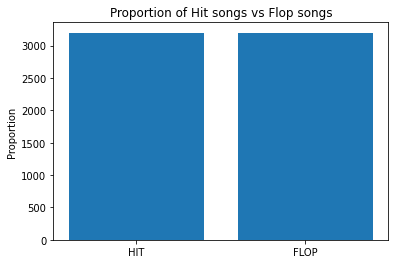

In [ ]:
hitorflop=[]
hitorflop=dataset['target'].to_list()
flop=0
hit=0
for i in hitorflop:
  if (i==0):
    flop=flop+1
  else:
    hit=hit+1
x=["HIT","FLOP"]
y=[hit,flop]
plt.title("Proportion of Hit songs vs Flop songs")
plt.ylabel("Proportion")
plt.bar(x,y)

Distribution of mode

<BarContainer object of 2 artists>

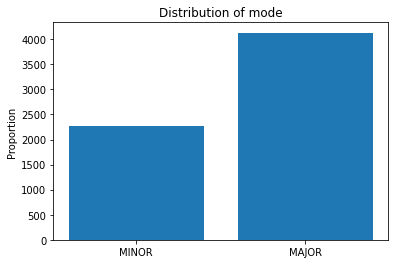

In [ ]:
mode=[]
mode=dataset['mode'].to_list()
minor=0
major=0
for i in mode:
  if (i==0):
    minor=minor+1
  else:
    major=major+1
x=["MINOR","MAJOR"]
y=[minor,major]
plt.title("Distribution of mode")
plt.ylabel("Proportion")
plt.bar(x,y)

Distribution of duration of song

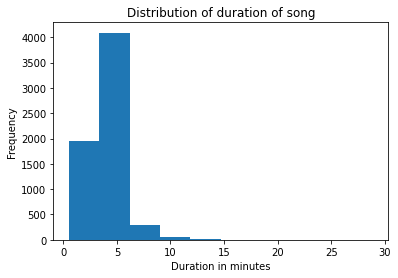

In [ ]:
a=dataset['duration_ms']
plt.hist(a/60000)
plt.title("Distribution of duration of song")
plt.ylabel("Frequency")
plt.xlabel("Duration in minutes")
plt.show()

Removing string value attributes 

In [ ]:
dataset1=dataset.copy()
dataset1=dataset1.drop(columns=["track","uri","artist"])
print(dataset1)

      danceability  energy  key  loudness  mode  speechiness  acousticness  \
0            0.741   0.626    1    -4.826     0       0.0886       0.02000   
1            0.447   0.247    5   -14.661     0       0.0346       0.87100   
2            0.550   0.415    9    -6.557     0       0.0520       0.16100   
3            0.502   0.648    0    -5.698     0       0.0527       0.00513   
4            0.807   0.887    1    -3.892     1       0.2750       0.00381   
...            ...     ...  ...       ...   ...          ...           ...   
6393         0.172   0.358    9   -14.430     1       0.0342       0.88600   
6394         0.910   0.366    1    -9.954     1       0.0941       0.09960   
6395         0.719   0.804   10    -4.581     1       0.0355       0.01320   
6396         0.600   0.177    7   -16.070     1       0.0561       0.98900   
6397         0.121   0.123    4   -23.025     0       0.0443       0.96400   

      instrumentalness  liveness  valence    tempo  duration_ms

Dealing with Outliers

Plotting boxplot for every possible attributes

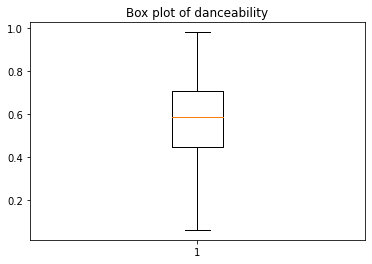

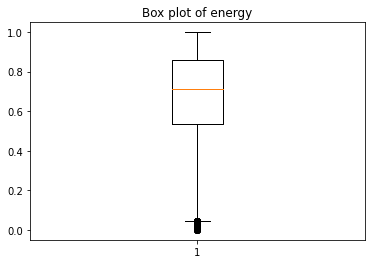

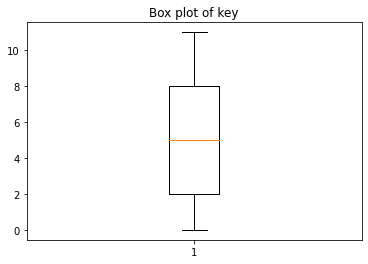

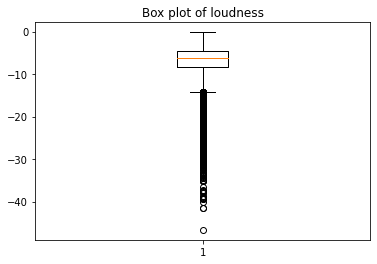

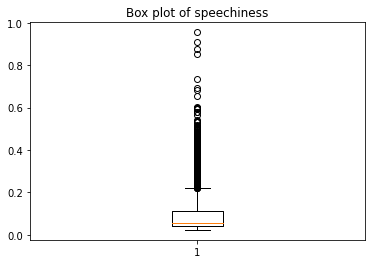

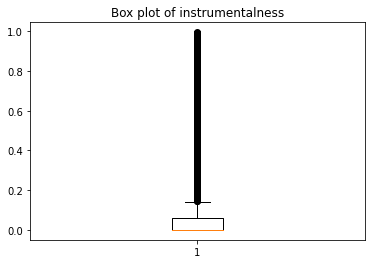

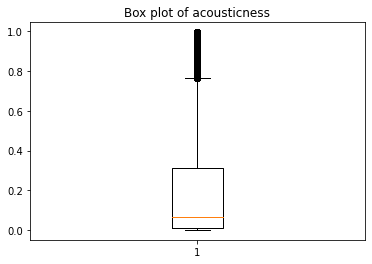

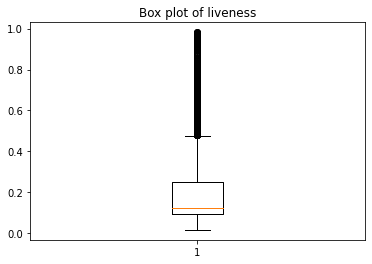

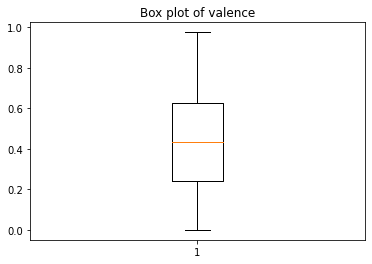

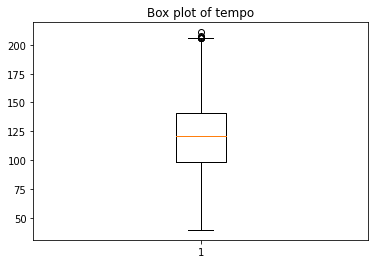

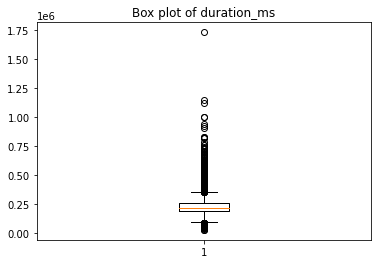

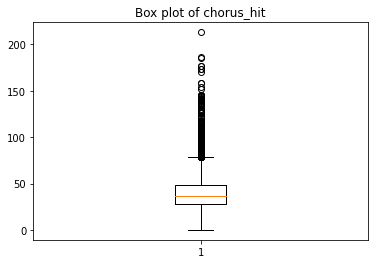

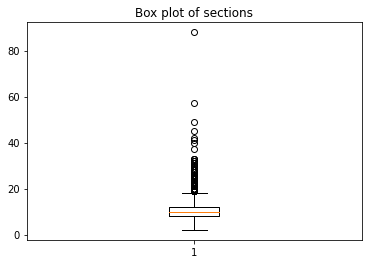

In [ ]:
d=dataset['danceability']
plt.boxplot(d)
plt.title("Box plot of danceability")
plt.show()
print("")
d=dataset['energy']
plt.boxplot(d)
plt.title("Box plot of energy")
plt.show()
print("")
c=dataset['key']
plt.title("Box plot of key")
plt.boxplot(c)
plt.show()
print("")
e=dataset['loudness']
plt.title("Box plot of loudness")
plt.boxplot(e)
plt.show()
print("")
f=dataset['speechiness']
plt.title("Box plot of speechiness")
plt.boxplot(f)
plt.show()
print("")
g=dataset['instrumentalness']
plt.title("Box plot of instrumentalness")
plt.boxplot(g)
plt.show()
print("")
i=dataset['acousticness']
plt.title("Box plot of acousticness")
plt.boxplot(i)
plt.show()
print("")
j=dataset['liveness']
plt.title("Box plot of liveness")
plt.boxplot(j)
plt.show()
print("")
k=dataset['valence']
plt.title("Box plot of valence")
plt.boxplot(k)
plt.show()
print("")
l=dataset['tempo']
plt.title("Box plot of tempo")
plt.boxplot(l)
plt.show()
print("")
m=dataset['duration_ms']
plt.title("Box plot of duration_ms")
plt.boxplot(m)
plt.show()
print("")
n=dataset['chorus_hit']
plt.title("Box plot of chorus_hit")
plt.boxplot(n)
plt.show()
print("")
o=dataset['sections']
plt.title("Box plot of sections")
plt.boxplot(o)
plt.show()
print("")

Dealing with NA values

In [ ]:
dataset.isnull().sum() 

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

ggplot Analysing Danceability and Valence:

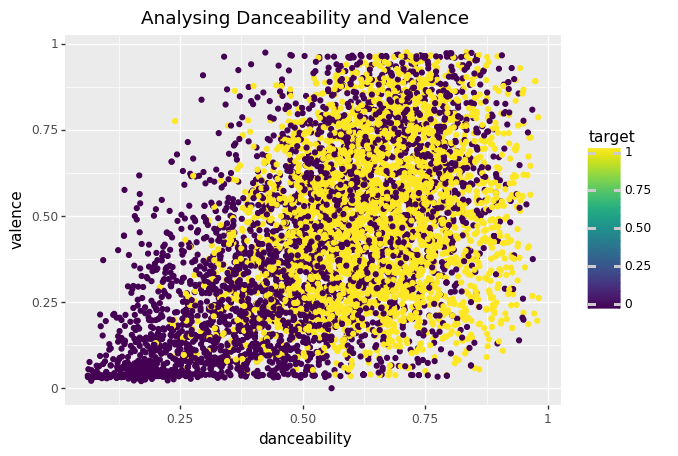

<ggplot: (8763316909334)>

In [ ]:
from plotnine import ggplot, aes, geom_point,ggtitle

(
    ggplot(dataset)  # What data to use
    + aes(x="danceability", y="valence",color="target")+ggtitle("Analysing Danceability and Valence")  # What variable to use
    + geom_point()  # Geometric object to use for drawing
)


ggplot  Analysing the key:

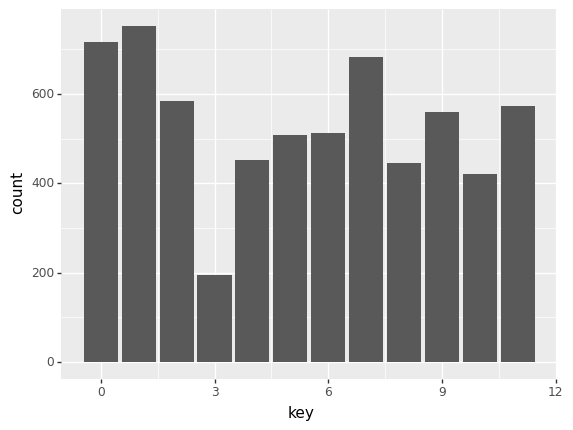

<ggplot: (8763316769579)>

In [ ]:
from plotnine import ggplot, aes, geom_bar

(
    ggplot(dataset)  # What data to use
    + aes(x="key",fill="target")  # What variable to use
    + geom_bar(aes(fill='target'))  # Geometric object to use for drawing
)

ggplot Analysing loudness and speechiness:

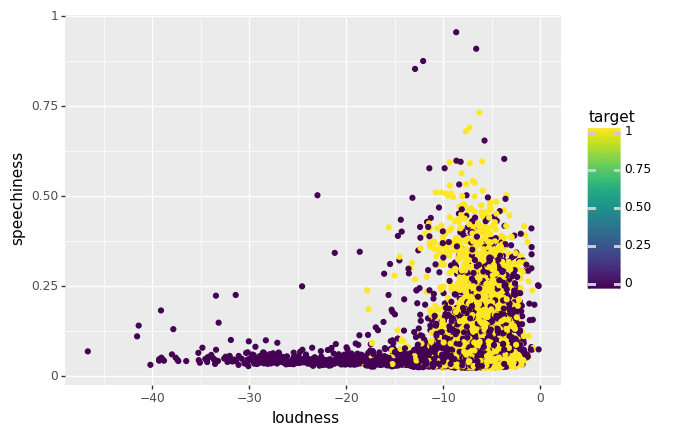

<ggplot: (8763316570727)>

In [ ]:
from plotnine import ggplot, aes, geom_point,scale_color_manual

(
    ggplot(dataset)  # What data to use
    + aes(x="loudness", y="speechiness",color="target")  # What variable to use
    + geom_point()  # Geometric object to use for drawing
)


ggplot Analysing acousticness and instrumentalness:

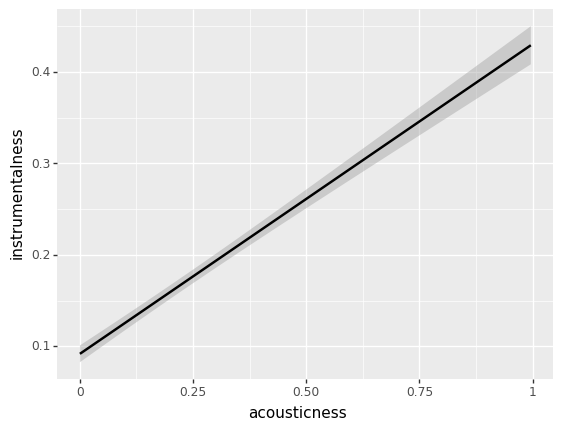

<ggplot: (8763310614185)>

In [ ]:
from plotnine import ggplot, aes, geom_smooth

(
    ggplot(dataset)  # What data to use
    + aes(x="acousticness", y="instrumentalness",color="target")  # What variable to use
    + geom_smooth(method='lm')  # Geometric object to use for drawing
)


ggplot Analysing time signature:

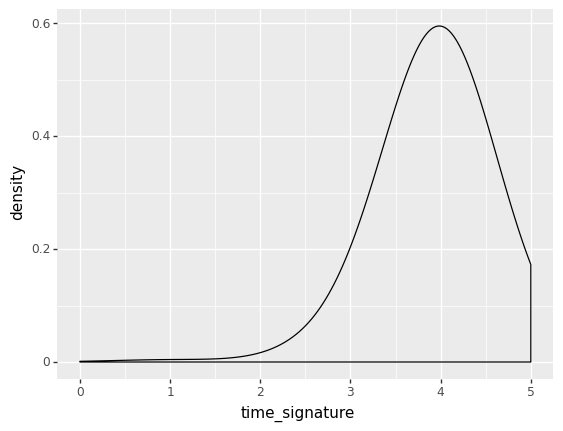

<ggplot: (8763310664614)>

In [ ]:
from plotnine import ggplot, aes, geom_density

(
    ggplot(dataset)  # What data to use
    + aes(x="time_signature",color="target")  # What variable to use
    + geom_density()  # Geometric object to use for drawing
)

ggplot Analysing duration of the songs and number of sections:

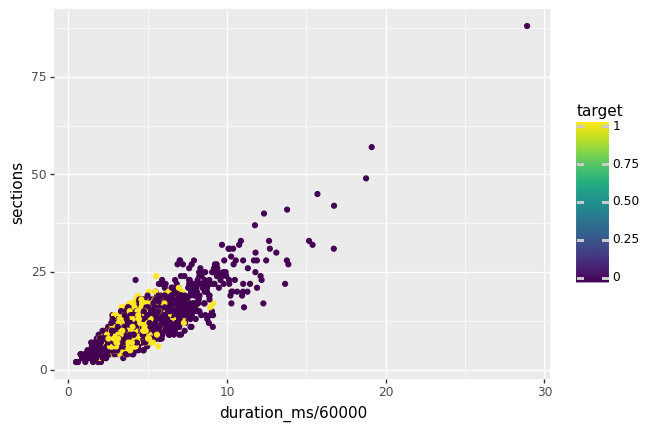

<ggplot: (8763310571674)>

In [ ]:
from plotnine import ggplot, aes, geom_point,scale_color_manual

(
    ggplot(dataset)  # What data to use
    + aes(x="duration_ms/60000", y="sections",color="target")  # What variable to use
    + geom_point()  # Geometric object to use for drawing
)

ggplot Analysing the tempo:

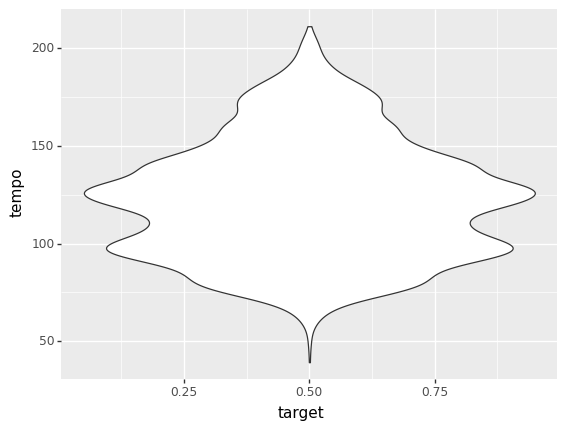

<ggplot: (8763310345906)>

In [ ]:
from plotnine import ggplot, aes, geom_violin

(
    ggplot(dataset)  # What data to use
    + aes(x="target", y="tempo",fill="target")  # What variable to use
    + geom_violin()  # Geometric object to use for drawing
)


ggplot Analysing chorus hit:

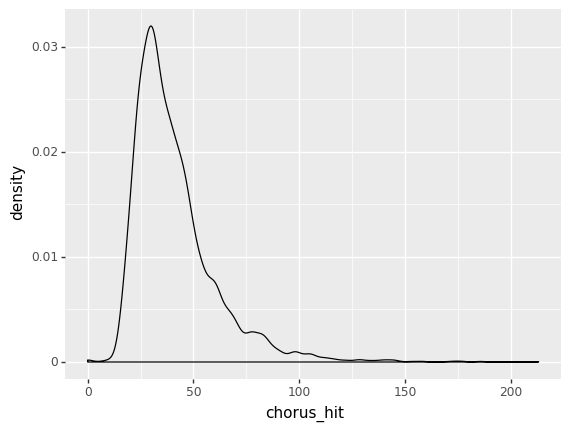

<ggplot: (8763310301115)>

In [ ]:
from plotnine import ggplot, aes, geom_density

(
    ggplot(dataset)  # What data to use
    + aes(x="chorus_hit",col="target")  # What variable to use
    + geom_density()  # Geometric object to use for drawing
)

ggplot Analysing energy and liveness:

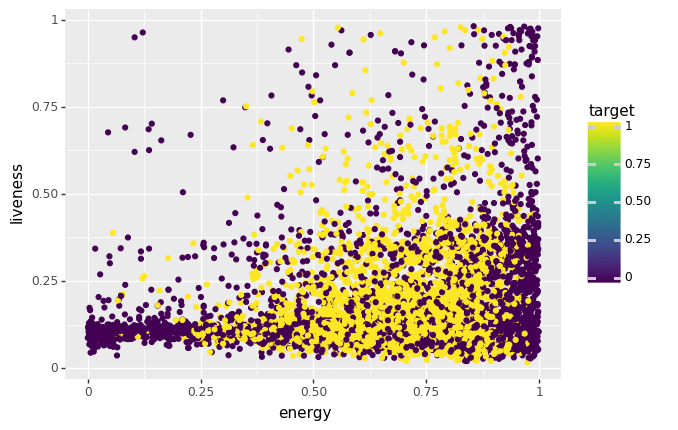

<ggplot: (8763316950733)>

In [ ]:
from plotnine import ggplot, aes, geom_point

(
    ggplot(dataset)  # What data to use
    + aes(x="energy", y="liveness",color="target")  # What variable to use
    + geom_point()  # Geometric object to use for drawing
)

Modelling:

In [ ]:
# dataset = pd.concat([dataset[["target","artist","uri","track"]].reset_index(drop= True),pd.DataFrame(scaler.transform(dataset[feature]),columns = feature)],axis=1)

In [ ]:
dataset.drop(["artist","uri","track"],axis=1,inplace=True)

In [ ]:
dataset.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


In [ ]:
X = dataset.iloc[:,0:15]
Y = dataset.iloc[:,[15]]
Y

,target
0,1
1,0
2,1
3,0
4,1
...,...
6393,0
6394,1
6395,1
6396,0


In [ ]:
from sklearn.model_selection import train_test_split #train-test split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=30)

In [ ]:
print(y_test)

      target
650        1
6085       1
3987       1
1567       1
5981       1
...      ...
5362       1
3873       1
333        1
2468       1
2310       1

[1280 rows x 1 columns]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Model-{} : Accuracy-{}%'.format(name,round(accuracy*100,2)))

Model-                   Logistic Regression : Accuracy-60.55%
Model-                   K-Nearest Neighbors : Accuracy-61.56%
Model-                         Decision Tree : Accuracy-76.41%
Model-Support Vector Machine (Linear Kernel) : Accuracy-49.45%
Model-   Support Vector Machine (RBF Kernel) : Accuracy-63.75%
Model-                        Neural Network : Accuracy-49.45%
Model-                         Random Forest : Accuracy-85.94%
Model-                     Gradient Boosting : Accuracy-85.0%


From the above output we can understand that random forest algorithm has the most accuracy.

Artist Network Analysis

Kaggle dataset: https://www.kaggle.com/code/hoandan/network-analysis/data

Pre-processing

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

In [ ]:
df = pd.read_csv('/content/artist_small.csv')
df.head()


,Unnamed: 0,mbid,artist_mb,artist_lastfm,country_mb,country_lastfm,tags_mb,tags_lastfm,listeners_lastfm,scrobbles_lastfm,ambiguous_artist
0,0,cc197bad-dc9c-440d-a5b5-d52ba2e14234,Coldplay,Coldplay,United Kingdom,United Kingdom,rock; pop; alternative rock; british; uk; brit...,rock; alternative; britpop; alternative rock; ...,5381567.0,360111850.0,False
1,1,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,Radiohead,United Kingdom,United Kingdom,rock; electronic; alternative rock; british; g...,alternative; alternative rock; rock; indie; el...,4732528.0,499548797.0,False
2,2,8bfac288-ccc5-448d-9573-c33ea2aa5c30,Red Hot Chili Peppers,Red Hot Chili Peppers,United States,United States,rock; alternative rock; 80s; 90s; rap; metal; ...,rock; alternative rock; alternative; Funk Rock...,4620835.0,293784041.0,False
3,3,73e5e69d-3554-40d8-8516-00cb38737a1c,Rihanna,Rihanna,United States,Barbados; United States,pop; dance; hip hop; reggae; contemporary r b;...,pop; rnb; female vocalists; dance; Hip-Hop; Ri...,4558193.0,199248986.0,False
4,4,b95ce3ff-3d05-4e87-9e01-c97b66af13d4,Eminem,Eminem,United States,United States,turkish; rap; american; hip-hop; hip hop; hiph...,rap; Hip-Hop; Eminem; hip hop; pop; american; ...,4517997.0,199507511.0,False


In [ ]:
df2 = df.iloc[: , 1:]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mbid              200 non-null    object 
 1   artist_mb         200 non-null    object 
 2   artist_lastfm     200 non-null    object 
 3   country_mb        193 non-null    object 
 4   country_lastfm    172 non-null    object 
 5   tags_mb           184 non-null    object 
 6   tags_lastfm       200 non-null    object 
 7   listeners_lastfm  200 non-null    float64
 8   scrobbles_lastfm  200 non-null    float64
 9   ambiguous_artist  200 non-null    bool   
dtypes: bool(1), float64(2), object(7)
memory usage: 14.4+ KB


In [ ]:
lastfm = df2.set_index(df2.columns.drop('tags_lastfm',1).tolist()).tags_lastfm.str.split(';', expand=True).stack().reset_index().rename(columns={0:'tags_lastfm'}).loc[:, df2.columns]

In [ ]:
lastfm.groupby("tags_lastfm").agg({ "mbid": pd.Series.nunique}).sort_values(by="mbid",ascending=False).head(50)

,mbid
tags_lastfm,
alternative,157
seen live,157
rock,142
00s,125
pop,118
male vocalists,112
alternative rock,103
american,99
indie,92


In [ ]:
lastfm = lastfm.groupby('tags_lastfm').filter(lambda x : x['mbid'].count() >= 30)

In [ ]:
lastfm_final = lastfm[['tags_lastfm','artist_lastfm' ]]
lastfm_final

,tags_lastfm,artist_lastfm
0,rock,Coldplay
1,alternative,Coldplay
3,alternative rock,Coldplay
4,indie,Coldplay
5,british,Coldplay
...,...,...
6036,punk,Breaking Benjamin
6037,rock,The All-American Rejects
6038,alternative,The All-American Rejects
6040,emo,The All-American Rejects


In [ ]:
lastfm_final=lastfm_final.drop_duplicates()

In [ ]:
lastfm_final.head(6000)

,tags_lastfm,artist_lastfm
0,rock,Coldplay
1,alternative,Coldplay
3,alternative rock,Coldplay
4,indie,Coldplay
5,british,Coldplay
...,...,...
6036,punk,Breaking Benjamin
6037,rock,The All-American Rejects
6038,alternative,The All-American Rejects
6040,emo,The All-American Rejects


Network Analysis

In [ ]:
lastfm_graph_2phia = nx.from_pandas_edgelist(lastfm_final, source='tags_lastfm', target='artist_lastfm')

In [ ]:
lastfm_graph_2phia.graph

{}

In [ ]:
tags = list(lastfm['tags_lastfm'].unique())
print('Total no of unique tags: {}'.format(len(tags)))

Total no of unique tags: 47


In [ ]:
artists = list(lastfm['artist_lastfm'].unique())
print('Total no of Artists: {}'.format(len(artists)))

Total no of Artists: 183


In [ ]:
node_labels = dict(zip(tags, tags))

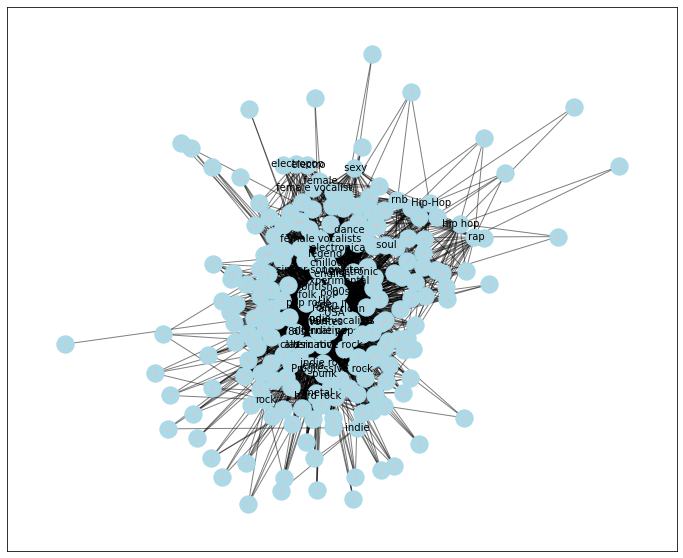

In [ ]:
pos = nx.spring_layout(lastfm_graph_2phia)
plt.figure(figsize=(12, 10))

nx.draw_networkx_nodes(lastfm_graph_2phia, pos,  node_size=300,node_color='lightblue')
nx.draw_networkx_nodes(lastfm_graph_2phia, pos, nodelist=artists, node_color='#cccccc', node_size=5)
nx.draw_networkx_edges(lastfm_graph_2phia, pos, alpha=0.5)
nx.draw_networkx_labels(lastfm_graph_2phia, pos, font_size=10, labels=node_labels)

plt.show()

In [ ]:
nodes_0 = list(set(lastfm_final['artist_lastfm'].values.tolist()))

nodes_1 = list(set(lastfm_final['tags_lastfm'].values.tolist()))

edges = lastfm_final.values.tolist()

In [ ]:
from networkx.algorithms import bipartite

lastfm_graph_2 = nx.Graph()
lastfm_graph_2.add_nodes_from(nodes_0, bipartite=0) # Add the node attribute “bipartite”
lastfm_graph_2.add_nodes_from(nodes_1, bipartite=1)
lastfm_graph_2.add_edges_from(edges,weight=1)

lastfm_graph_2.edges(data=True)
lastfm_graph = nx.projected_graph(lastfm_graph_2, nodes_0)

In [ ]:
print("Nodes:" + str(lastfm_graph.number_of_nodes()))
print("Edges:" + str(lastfm_graph.number_of_edges()))

Nodes:183
Edges:15529


Degree of Taylor Swift

In [ ]:
lastfm_graph.degree('Taylor Swift')

174

Degree of each node (Artist)

In [ ]:
[lastfm_graph.degree(artist) for artist in artists]

[177,
 178,
 175,
 181,
 182,
 167,
 182,
 173,
 178,
 178,
 175,
 177,
 178,
 132,
 180,
 178,
 178,
 165,
 178,
 181,
 175,
 175,
 176,
 178,
 175,
 167,
 175,
 165,
 179,
 124,
 168,
 180,
 176,
 180,
 128,
 176,
 179,
 176,
 152,
 178,
 167,
 152,
 169,
 170,
 181,
 174,
 167,
 176,
 174,
 178,
 179,
 176,
 178,
 175,
 174,
 167,
 180,
 173,
 181,
 151,
 148,
 173,
 180,
 176,
 176,
 180,
 180,
 178,
 125,
 182,
 155,
 179,
 177,
 158,
 178,
 178,
 179,
 175,
 178,
 175,
 179,
 180,
 182,
 177,
 169,
 180,
 182,
 177,
 180,
 174,
 176,
 170,
 182,
 178,
 172,
 180,
 164,
 179,
 157,
 178,
 178,
 179,
 179,
 176,
 175,
 178,
 174,
 175,
 165,
 168,
 151,
 174,
 178,
 177,
 165,
 151,
 173,
 159,
 179,
 181,
 150,
 173,
 152,
 129,
 178,
 178,
 179,
 181,
 181,
 167,
 65,
 178,
 178,
 141,
 160,
 171,
 174,
 175,
 179,
 144,
 180,
 178,
 165,
 177,
 176,
 177,
 174,
 158,
 181,
 180,
 179,
 175,
 178,
 176,
 180,
 176,
 172,
 132,
 181,
 176,
 175,
 175,
 178,
 178,
 36,
 179,
 168,


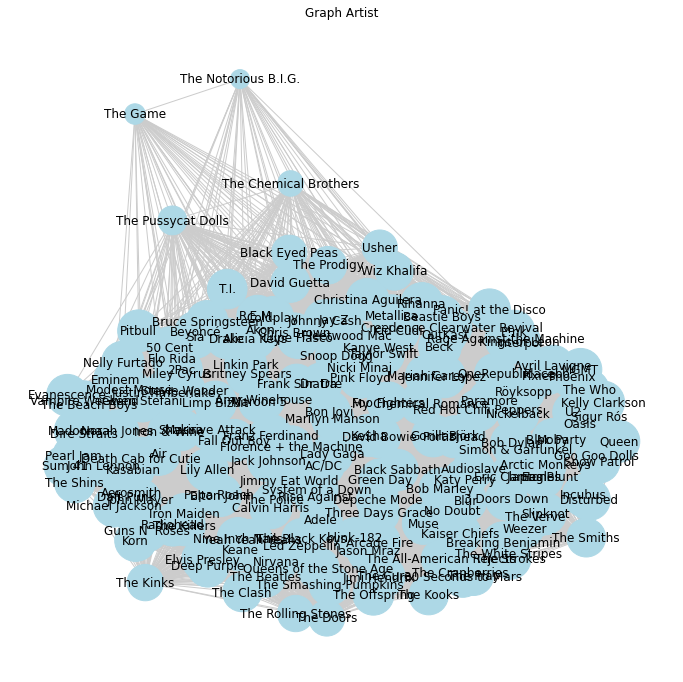

In [ ]:
plt.figure(figsize=(12, 12))
 
layout = nx.spring_layout(lastfm_graph,iterations=50)


artist_size = [lastfm_graph.degree(artist) * 10 for artist in artists]
nx.draw_networkx_nodes(lastfm_graph, 
                       layout, 
                       nodelist=artists, 
                       node_size=artist_size,
                       node_color='lightblue')


nx.draw_networkx_edges(lastfm_graph, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(artists, artists))
nx.draw_networkx_labels(lastfm_graph, layout, labels=node_labels)

plt.axis('off')

plt.title("Graph Artist")

plt.show()

In [ ]:
from community import community_louvain 
partition = community_louvain.best_partition(lastfm_graph, resolution = 1)
values = list(partition.values())
print('Number of communities:', len(np.unique(values)))

Number of communities: 3


Artists in Community 1:

In [ ]:
search_k = 0
for name, k in partition.items(): 
    if k == search_k:
        print(name)


Coldplay
3 Doors Down
Madonna
R.E.M.
Bruce Springsteen
Phoenix
The Police
Bon Jovi
Foo Fighters
Florence + the Machine
Moby
The All-American Rejects
Fall Out Boy
The Smiths
Daft Punk
U2
Audioslave
Kings of Leon
Weezer
Adele
Nickelback
Interpol
Red Hot Chili Peppers
The White Stripes
Pixies
Goo Goo Dolls
The Cranberries
OneRepublic
Evanescence
Aerosmith
My Chemical Romance
The Shins
Papa Roach
Amy Winehouse
Jimmy Eat World
Vampire Weekend
Paramore


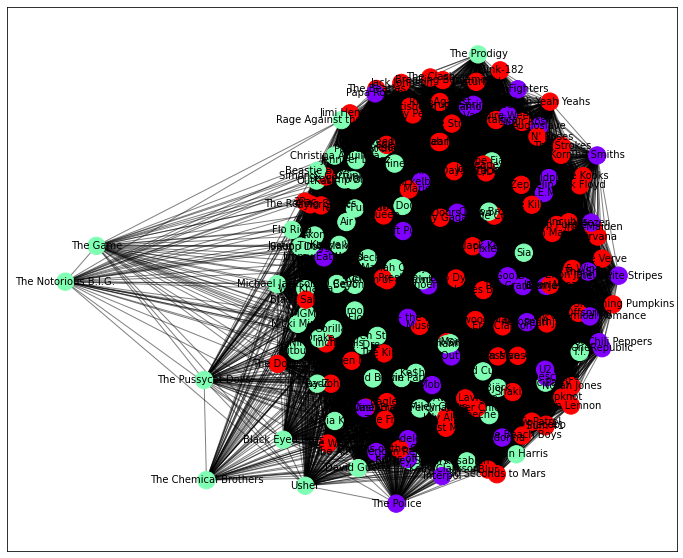

In [ ]:
pos = nx.spring_layout(lastfm_graph)
cmap = cm.get_cmap('rainbow', max(partition.values()) + 1)
plt.figure(figsize=(12, 10))

nx.draw_networkx_nodes(lastfm_graph, pos, partition.keys(), node_size=300,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(lastfm_graph, pos, alpha=0.5)
nx.draw_networkx_labels(lastfm_graph, pos, font_size=10)

plt.show()

In [ ]:
from networkx.algorithms.community.centrality import girvan_newman
communities = girvan_newman(lastfm_graph)

tuple(sorted(c) for c in next(communities))

(['2Pac',
  '3 Doors Down',
  '30 Seconds to Mars',
  '50 Cent',
  'AC/DC',
  'Adele',
  'Aerosmith',
  'Air',
  'Akon',
  'Alicia Keys',
  'Amy Winehouse',
  'Arcade Fire',
  'Arctic Monkeys',
  'Audioslave',
  'Avril Lavigne',
  'Beastie Boys',
  'Beck',
  'Beyoncé',
  'Björk',
  'Black Eyed Peas',
  'Black Sabbath',
  'Bloc Party',
  'Blur',
  'Bob Dylan',
  'Bob Marley',
  'Bon Jovi',
  'Breaking Benjamin',
  'Britney Spears',
  'Bruce Springsteen',
  'Calvin Harris',
  'Chris Brown',
  'Christina Aguilera',
  'Coldplay',
  'Creedence Clearwater Revival',
  'Daft Punk',
  'David Bowie',
  'David Guetta',
  'Death Cab for Cutie',
  'Deep Purple',
  'Depeche Mode',
  'Dire Straits',
  'Disturbed',
  'Dr. Dre',
  'Drake',
  'Eagles',
  'Elton John',
  'Elvis Presley',
  'Eminem',
  'Eric Clapton',
  'Evanescence',
  'Fall Out Boy',
  'Fleetwood Mac',
  'Flo Rida',
  'Florence + the Machine',
  'Foo Fighters',
  'Frank Sinatra',
  'Franz Ferdinand',
  'Goo Goo Dolls',
  'Gorillaz',
  '

In [ ]:
clocen = nx.closeness_centrality(lastfm_graph)
sorted_clocen = sorted(clocen.items(), key=lambda x:x[1], reverse=1)[0:10]
sorted_clocen

[('Akon', 1.0),
 ('Snoop Dogg', 1.0),
 ('OutKast', 1.0),
 ('Eminem', 1.0),
 ('Kanye West', 1.0),
 ('50 Cent', 1.0),
 ('Mariah Carey', 1.0),
 ('Gorillaz', 0.994535519125683),
 ('Nelly Furtado', 0.994535519125683),
 ('Limp Bizkit', 0.994535519125683)]

In [ ]:
pr = nx.pagerank(lastfm_graph)
sorted_pr = sorted(pr.items(), key=lambda x:x[1], reverse=1)[0:10]
sorted_pr

[('Eminem', 0.005833096178398302),
 ('Kanye West', 0.005833096178398302),
 ('50 Cent', 0.005833096178398302),
 ('Mariah Carey', 0.005833096178398302),
 ('Akon', 0.005833096178398301),
 ('Snoop Dogg', 0.005833096178398301),
 ('OutKast', 0.005833096178398301),
 ('Gorillaz', 0.00580528263394643),
 ('Beck', 0.00580528263394643),
 ('Christina Aguilera', 0.0058044891169720435)]

In [ ]:
betcen = nx.betweenness_centrality(lastfm_graph)
sorted_betcen = sorted(betcen.items(), key=lambda x:x[1], reverse=1)[0:10]
sorted_betcen

[('Akon', 0.0009854178386638982),
 ('Snoop Dogg', 0.0009854178386638982),
 ('OutKast', 0.0009854178386638982),
 ('Eminem', 0.0009854178386638982),
 ('Kanye West', 0.0009854178386638982),
 ('50 Cent', 0.0009854178386638982),
 ('Mariah Carey', 0.0009854178386638982),
 ('Gorillaz', 0.000965293180336172),
 ('Beck', 0.000965293180336172),
 ('Nelly Furtado', 0.0009534712612906256)]